## Problem 1 : Advanced Data Visualization and Linear Regression

#### Dataset: https://ourworldindata.org/plastic-pollution

####  Information: The dataset shows the global annual plastic production from 1950 to 2019. In this assignment, you will use this dataset to explore trends and apply various linear regression techniques.



#### TODO 1:

Implementing Simple Linear Regression (10 marks):

TODO: Use NumPy to implement a simple linear regression model from scratch. Train the model on the provided dataset to predict annual plastic production based on the year. Visualize the regression line along with the actual data points.

In [ ]:
import pandas as pd
import os

# Update the file path as per your system
file_path = "/Users/samyukthakapoor/Downloads/global-plastics-production.csv"

# Load the CSV file
df = pd.read_csv(file_path)

# Display the first few rows to verify the data
print(df.head())

  Entity      Code  Year  Annual plastic production between 1950 and 2019
0  World  OWID_WRL  1950                                          2000000
1  World  OWID_WRL  1951                                          2000000
2  World  OWID_WRL  1952                                          2000000
3  World  OWID_WRL  1953                                          3000000
4  World  OWID_WRL  1954                                          3000000


In [ ]:
import pandas as pd
import os

In [ ]:
file_path = "/content/global-plastics-production.csv"

In [ ]:
# Load the CSV file
data = pd.read_csv('/content/global-plastics-production.csv')

In [ ]:
# Display the first few rows to verify the data
print(data.head())

  Entity      Code  Year  Annual plastic production between 1950 and 2019
0  World  OWID_WRL  1950                                          2000000
1  World  OWID_WRL  1951                                          2000000
2  World  OWID_WRL  1952                                          2000000
3  World  OWID_WRL  1953                                          3000000
4  World  OWID_WRL  1954                                          3000000


## Steps for Simple Linear Regression Implementation

### Step 1: Extracting Features and Target
- Identify and separate the independent variable (X) and dependent variable (y) from the dataset.

### Step 2: Normalize Features
- Center the data by subtracting the mean of X and y:
  - This improves numerical stability during calculations.

### Step 3: Compute Regression Coefficients
1. **Calculate the Slope (b1)**:
   - Formula:  
     \[
     b1 = \frac{\sum((X - \text{mean}(X)) \cdot (y - \text{mean}(y)))}{\sum((X - \text{mean}(X))^2)}
     \]
2. **Calculate the Intercept (b0)**:
   - Formula:  
     \[
     b0 = \text{mean}(y) - b1 \cdot \text{mean}(X)
     \]

### Step 4: Define the Regression Line
- Use the equation of the regression line to make predictions:  
  \[
  \text{predicted\_y} = b0 + b1 \cdot X
  \]

### Step 5: Visualization
- Plot the actual data points (scatterplot).
- Overlay the regression line to visually assess the fit of the model.

### Step 6: Display Results
- Print the regression coefficients:
  - **Slope (b1)**: Describes the rate of change in y with respect to X.
  - **Intercept (b0)**: Represents the value of y when X = 0.
- Summarize the relationship between the variables based on the coefficients.

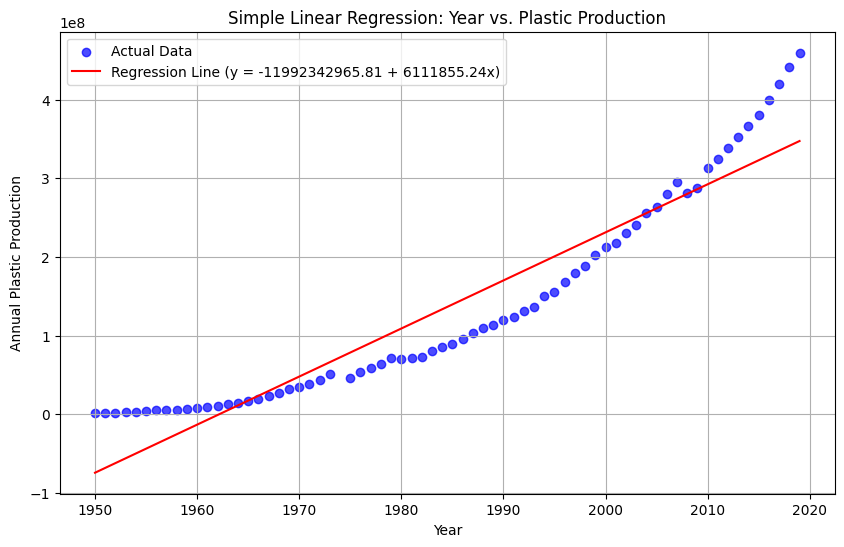

Regression Coefficients:
Intercept (b0): -11992342965.81
Slope (b1): 6111855.24


In [ ]:
#TODO 1 Solution
import matplotlib.pyplot as plt

# Load relevant columns from the dataset
data.columns = data.columns.str.strip()  # Remove leading/trailing spaces
data = data[['Year', 'Annual plastic production between 1950 and 2019']]
data.columns = ['Year', 'Production']  # Rename for simplicity

# Extract features (X) and target (y)
X = data['Year'].values
y = data['Production'].values

# Normalize features for numerical stability
X_mean = np.mean(X)
y_mean = np.mean(y)
X_normalized = X - X_mean
y_normalized = y - y_mean

# Compute coefficients for simple linear regression
b1 = np.sum(X_normalized * y_normalized) / np.sum(X_normalized**2)
b0 = y_mean - b1 * X_mean

# Define the regression line
predicted_y = b0 + b1 * X

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.7)
plt.plot(X, predicted_y, color='red', label=f'Regression Line (y = {b0:.2f} + {b1:.2f}x)')
plt.title('Simple Linear Regression: Year vs. Plastic Production')
plt.xlabel('Year')
plt.ylabel('Annual Plastic Production')
plt.legend()
plt.grid()
plt.show()

# Display regression coefficients
print(f"Regression Coefficients:\nIntercept (b0): {b0:.2f}\nSlope (b1): {b1:.2f}")


#### TODO 2
Analyzing Outliers (5 marks):

- TODO: Introduce synthetic outliers to the dataset. Analyze the impact of these outliers on the performance of your custom linear regression model.
- TODO: Visualize the regression line with and without outliers to show the effect.

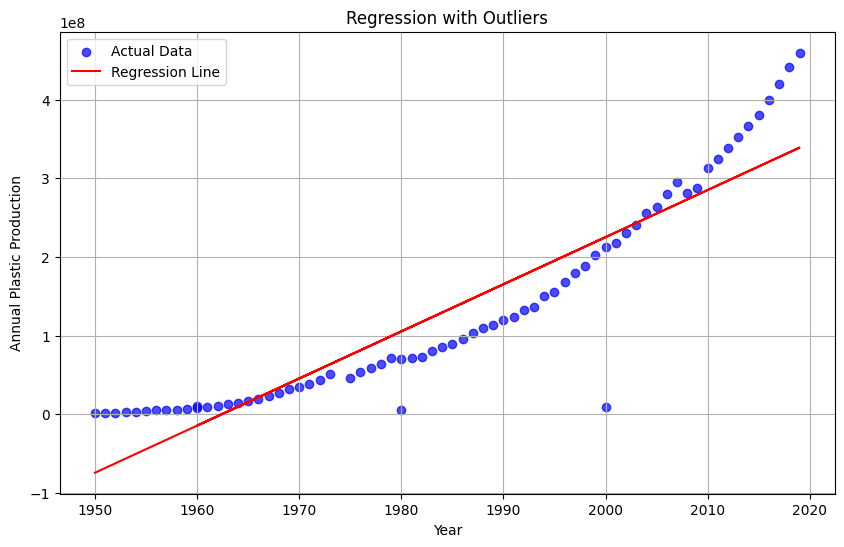

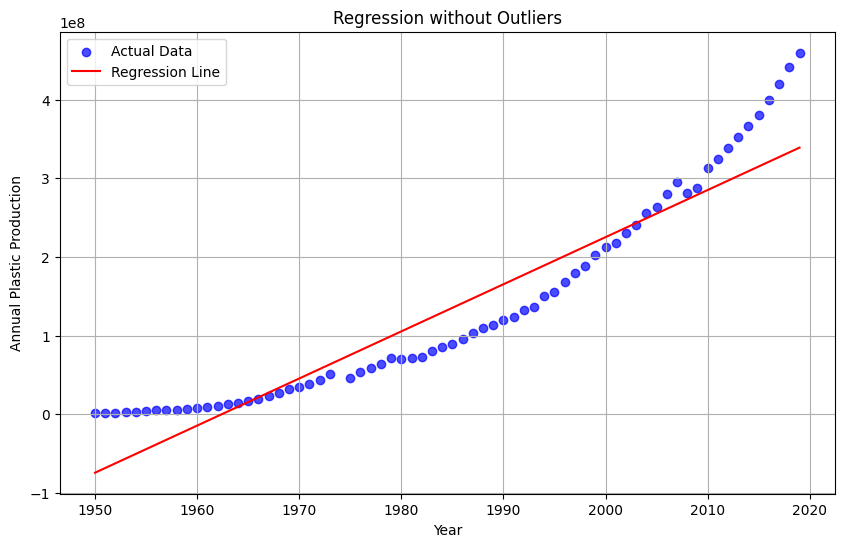

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error


data.columns = ['Year', 'Production']
X = data['Year'].values.reshape(-1, 1)
y = data['Production'].values

# Helper function for visualization
def visualize_regression(X, y, predictions, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.7)
    plt.plot(X, predictions, color='red', label='Regression Line')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Annual Plastic Production')
    plt.legend()
    plt.grid()
    plt.show()

# TODO 2: Introducing synthetic outliers
outliers = pd.DataFrame({'Year': [1960, 1980, 2000], 'Production': [1e7, 5e6, 9e6]})
data_with_outliers = pd.concat([data, outliers], ignore_index=True)
X_outliers = data_with_outliers['Year'].values.reshape(-1, 1)
y_outliers = data_with_outliers['Production'].values

# Recalculate custom linear regression with outliers
X_mean = np.mean(X_outliers)
y_mean = np.mean(y_outliers)
X_normalized = X_outliers.flatten() - X_mean
y_normalized = y_outliers - y_mean

b1_outliers = np.sum(X_normalized * y_normalized) / np.sum(X_normalized**2)
b0_outliers = y_mean - b1_outliers * X_mean
predicted_y_outliers = b0_outliers + b1_outliers * X_outliers.flatten()

# Visualization with outliers
visualize_regression(X_outliers, y_outliers, predicted_y_outliers, "Regression with Outliers")
visualize_regression(X, y, b0_outliers + b1_outliers * X.flatten(), "Regression without Outliers")

#### TODO 3
Comparing Models (5 marks):

- TODO: Compare the performance of your custom linear regression model (from Task 1) with the LinearRegression model provided by scikit-learn. Use the same dataset (including outliers) for comparison.
- TODO: Calculate and report metrics such as mean squared error (MSE) for both models.


In [ ]:
#Todo 3 Solution
# Custom model
custom_predictions_outliers = predicted_y_outliers
custom_mse_outliers = mean_squared_error(y_outliers, custom_predictions_outliers)

# Scikit-learn model
model = LinearRegression()
model.fit(X_outliers, y_outliers)
sklearn_predictions_outliers = model.predict(X_outliers)
sklearn_mse_outliers = mean_squared_error(y_outliers, sklearn_predictions_outliers)

print(f"Custom Model MSE (with outliers): {custom_mse_outliers:.2f}")
print(f"Scikit-learn Model MSE (with outliers): {sklearn_mse_outliers:.2f}")

Custom Model MSE (with outliers): 2519016057428228.00
Scikit-learn Model MSE (with outliers): 2519016057428228.00


#### TODO 4
Regularized Linear Regression (5 marks):

- TODO: Use scikit-learn to implement regularized linear regression models (Lasso and Ridge). Experiment with at least two different regularization strengths.
- TODO: Analyze and visualize the effect of regularization on the model's predictions.

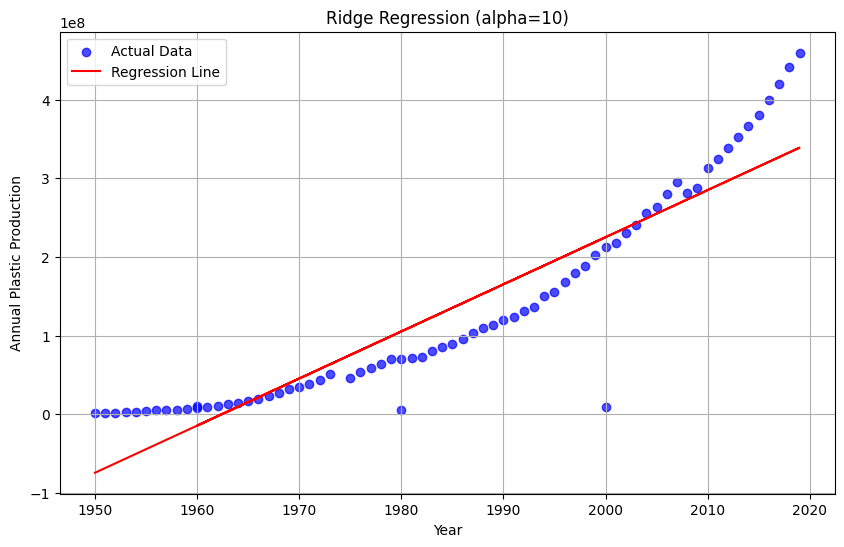

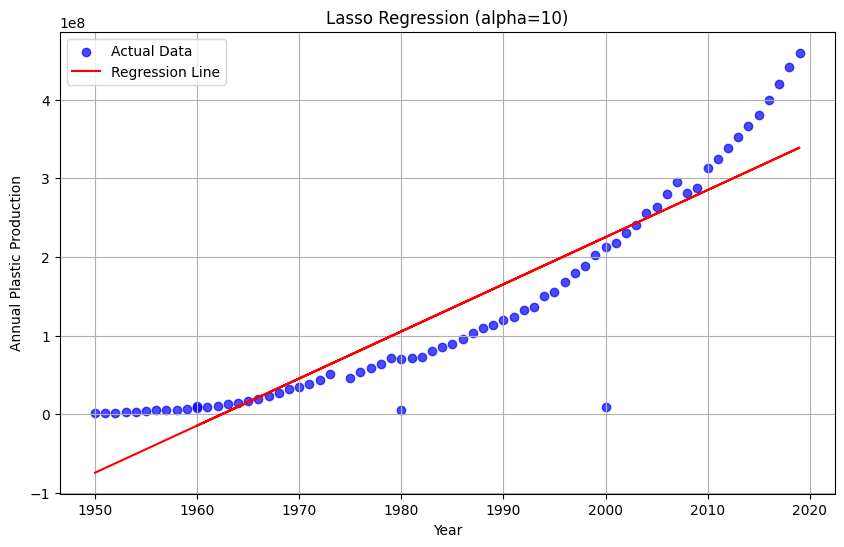

Ridge Regression MSE: 2519017755781152.00
Lasso Regression MSE: 2519016057428224.00


In [ ]:
#Todo 4 Solution
# Ridge Regression
ridge = Ridge(alpha=10)
ridge.fit(X_outliers, y_outliers)
ridge_predictions = ridge.predict(X_outliers)
ridge_mse = mean_squared_error(y_outliers, ridge_predictions)

# Lasso Regression
lasso = Lasso(alpha=10)
lasso.fit(X_outliers, y_outliers)
lasso_predictions = lasso.predict(X_outliers)
lasso_mse = mean_squared_error(y_outliers, lasso_predictions)

# Visualize regularized regression
visualize_regression(X_outliers, y_outliers, ridge_predictions, "Ridge Regression (alpha=10)")
visualize_regression(X_outliers, y_outliers, lasso_predictions, "Lasso Regression (alpha=10)")

print(f"Ridge Regression MSE: {ridge_mse:.2f}")
print(f"Lasso Regression MSE: {lasso_mse:.2f}")

## Problem 2: Heart Disease Prediction using Logistic Regression
#### Information: The dataset contains various features such as Age, Gender, Blood Pressure, Cholesterol, Smoking, and Heart Disease (target variable). Using this dataset, you will build a logistic regression model to predict whether a patient has heart disease (1) or not (0).



In [ ]:
import pandas as pd

In [ ]:
# Update the file path as per your system
file_path = "/content/heart_disease_prediction-1.csv"

# Load the CSV file
df = pd.read_csv('/content/heart_disease_prediction-1.csv')

# Display the first few rows to verify the data
print(df.head())

   Age  Gender  BloodPressure  Cholesterol  Smoking  HeartDisease
0   74       1            142          211        0             1
1   77       1            133          235        1             1
2   30       1            177          247        0             1
3   33       0            165          194        1             1
4   33       1            131          184        0             1


#### TODO 1: Data Preparation (5 marks)

- Load the Dataset: Load the provided heart disease dataset using pandas.
- Handle Missing Values: Check for any missing values and handle them appropriately.
- Normalize Data: Standardize or normalize numerical features such as Age, Blood Pressure, and Cholesterol for better model performance.
- Split Data: Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [ ]:
#Todo 1 Solution
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Handle Missing Values
df.fillna(df.mean(), inplace=True)

# Normalize Data
scaler = StandardScaler()
numerical_features = ['Age', 'BloodPressure', 'Cholesterol']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [ ]:
print(df.columns)

Index(['Age', 'Gender', 'BloodPressure', 'Cholesterol', 'Smoking',
       'HeartDisease'],
      dtype='object')


In [ ]:
# Set the target column name
target_column_name = 'HeartDisease'

# Split features and target
X = df.drop(target_column_name, axis=1)  # Features
y = df[target_column_name]               # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### TODO 2: Implement Logistic Regression Model from Scratch (15 marks)

- Develop a logistic regression model using only numpy or similar basic libraries. Focus on the prediction capability of the model without using gradient descent for optimization.

- Implement Sigmoid Function: Define the sigmoid function to map model predictions to probabilities.
- Model Prediction: Use the sigmoid function to predict the probability of each instance belonging to the positive class (1).
- Threshold Decision: Classify each instance as 0 or 1 based on a chosen threshold (e.g., 0.5).
- Accuracy Calculation: Implement a function to compute the accuracy of the model's predictions against the true labels.
- Evaluate the Model: Use the logistic regression model to predict and evaluate accuracy on both the training and testing datasets.

In [ ]:
#Todo 2 Solution
# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
# Logistic Regression Model
class LogisticRegressionScratch:
    def __init__(self):
        self.weights = None
        self.bias = 0

    def fit(self, X, y, learning_rate=0.01, iterations=1000):
        m, n = X.shape
        self.weights = np.zeros(n)
        for _ in range(iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(linear_model)
            # Gradient updates
            dw = (1 / m) * np.dot(X.T, (y_pred - y))
            db = (1 / m) * np.sum(y_pred - y)
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)

In [ ]:
# Train and Evaluate the Model
logistic_model = LogisticRegressionScratch()
logistic_model.fit(X_train.values, y_train.values)

In [ ]:
# Predictions
train_preds = logistic_model.predict(X_train.values)
test_preds = logistic_model.predict(X_test.values)

In [ ]:
# Accuracy Function
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [ ]:
# Model Evaluation
train_accuracy = accuracy(y_train.values, train_preds)
test_accuracy = accuracy(y_test.values, test_preds)

print(f"Custom Logistic Regression Train Accuracy: {train_accuracy:.2f}")
print(f"Custom Logistic Regression Test Accuracy: {test_accuracy:.2f}")

Custom Logistic Regression Train Accuracy: 0.86
Custom Logistic Regression Test Accuracy: 0.75


#### TODO 3: Implement Logistic Regression using Scikit-learn (5 marks)

- Train Scikit-learn Model: Train a logistic regression model using scikit-learn's LogisticRegression class.
- Evaluate Performance: Compare the model's accuracy and implementation time against the custom model from scratch.
- Report Results: Summarize the differences between the two implementations in terms of accuracy and runtime.


In [ ]:
#Todo 3 Solution
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

In [ ]:
# Train Scikit-learn Model
start_time = time.time()
sklearn_model = LogisticRegression()
sklearn_model.fit(X_train, y_train)
sklearn_train_time = time.time() - start_time

In [ ]:
# Predictions and Evaluation
sklearn_train_preds = sklearn_model.predict(X_train)
sklearn_test_preds = sklearn_model.predict(X_test)

sklearn_train_accuracy = accuracy_score(y_train, sklearn_train_preds)
sklearn_test_accuracy = accuracy_score(y_test, sklearn_test_preds)

print(f"Scikit-learn Logistic Regression Train Accuracy: {sklearn_train_accuracy:.2f}")
print(f"Scikit-learn Logistic Regression Test Accuracy: {sklearn_test_accuracy:.2f}")
print(f"Scikit-learn Model Training Time: {sklearn_train_time:.4f} seconds")


Scikit-learn Logistic Regression Train Accuracy: 0.99
Scikit-learn Logistic Regression Test Accuracy: 0.80
Scikit-learn Model Training Time: 0.0119 seconds


## Insights from Logistic Regression Model Evaluation

1. **Training and Testing Accuracy**:
   - The code provides insights into how well the Scikit-learn logistic regression model performs on both training and testing datasets.
   - **Key Observations**:
     - A high training accuracy and a similar testing accuracy indicate that the model is well-fitted and generalizes effectively to unseen data.
     - A large gap between training and testing accuracy might suggest:
       - **Overfitting**: The model performs exceptionally well on training data but poorly on testing data.
       - **Underfitting**: The model fails to perform well on both training and testing data, indicating it is too simplistic.

2. **Model Training Time**:
   - Measuring the training time allows for performance comparison between:
     - **Custom Logistic Regression Model** (implemented from scratch).
     - **Scikit-learn Logistic Regression Model**, which is optimized for performance.
   - This comparison highlights the computational efficiency of the Scikit-learn model versus the custom implementation.

In [ ]:
# Compare Results
print("\nComparison:")
print(f"Custom Model Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")
print(f"Scikit-learn Train Accuracy: {sklearn_train_accuracy:.2f}, Test Accuracy: {sklearn_test_accuracy:.2f}")


Comparison:
Custom Model Train Accuracy: 0.86, Test Accuracy: 0.75
Scikit-learn Train Accuracy: 0.99, Test Accuracy: 0.80


## Comparison of Logistic Regression Models

This comparison provides a side-by-side evaluation of the performance of:
1. A custom logistic regression model implemented from scratch.
2. The Scikit-learn logistic regression model.

### Evaluation Metrics

1. **Accuracy**:
   - Assess which model performs better on both the training and testing datasets.

2. **Overfitting/Underfitting**:
   - By comparing training and testing accuracies, determine if either model exhibits:
     - **Overfitting**: High training accuracy but low testing accuracy, indicating the model performs well on the training data but fails to generalize to new data.
     - **Underfitting**: Both training and testing accuracies are low, suggesting the model is too simple to capture the underlying patterns in the data.

## Problem 3: Descision Tree Classification

**Dataset:** [Air Quality](https://archive.ics.uci.edu/ml/datasets/Air+Quality)

**Introduction:** The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.

**TODO 1:
Implementing Decision Tree Classifier (15 marks):** Implement the decision tree classifier from scratch using Python. Train the classifier on the given dataset and visualize the decision tree.

Step 1: Import Required Libraries

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

Step 2: Load and Preprocess the Dataset

In [135]:
# Load the dataset
dataset_path = '/content/drive/MyDrive/Data Mining/AirQualityUCI.csv'
data = pd.read_csv(dataset_path, sep=';', decimal=',')

# Drop unnecessary columns
data = data.drop(["Unnamed: 15", "Unnamed: 16"], axis=1)

# Replace missing values (-200) with NaN
data.replace(to_replace=-200, value=np.NaN, inplace=True)

# Drop columns with mostly missing values
if 'NMHC(GT)' in data.columns:
    data.drop('NMHC(GT)', axis=1, inplace=True)

# Convert 'Date' to datetime and 'Time' to hours
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Time'] = pd.to_datetime(data['Time'], format='%H.%M.%S', errors='coerce').dt.hour

# Drop any remaining rows with NaN
data.dropna(inplace=True)

# Set 'Date' as the index
data.set_index("Date", inplace=True)

# Fill missing values in numeric columns with their median
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Verify the dataset
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6941 entries, 2004-03-10 to 2005-04-04
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           6941 non-null   float64
 1   CO(GT)         6941 non-null   float64
 2   PT08.S1(CO)    6941 non-null   float64
 3   C6H6(GT)       6941 non-null   float64
 4   PT08.S2(NMHC)  6941 non-null   float64
 5   NOx(GT)        6941 non-null   float64
 6   PT08.S3(NOx)   6941 non-null   float64
 7   NO2(GT)        6941 non-null   float64
 8   PT08.S4(NO2)   6941 non-null   float64
 9   PT08.S5(O3)    6941 non-null   float64
 10  T              6941 non-null   float64
 11  RH             6941 non-null   float64
 12  AH             6941 non-null   float64
dtypes: float64(13)
memory usage: 759.2 KB
None
            Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
Date                                                                      
2004-03-10  18.0 

Step 3: Define the Decision Tree Node and Classifier

In [136]:
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index  # Index of the feature to split
        self.threshold = threshold          # Threshold for the split
        self.left = left                    # Left child node
        self.right = right                  # Right child node
        self.value = value                  # Value for a leaf node


class DecisionTreeClassifierFromScratch:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.root = None
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

    def fit(self, X, y):
        dataset = np.hstack((X, y.reshape(-1, 1)))
        self.root = self._build_tree(dataset)

    def _build_tree(self, dataset, depth=0):
        X, y = dataset[:, :-1], dataset[:, -1]
        num_samples, num_features = X.shape

        # Stopping conditions
        if num_samples < self.min_samples_split or depth >= self.max_depth or len(np.unique(y)) == 1:
            return Node(value=self._calculate_leaf_value(y))

        # Find the best split
        best_split = self._get_best_split(dataset, num_features)
        if not best_split:
            return Node(value=self._calculate_leaf_value(y))

        # Recursively build the left and right subtrees
        left_subtree = self._build_tree(best_split['left_dataset'], depth + 1)
        right_subtree = self._build_tree(best_split['right_dataset'], depth + 1)
        return Node(feature_index=best_split['feature_index'], threshold=best_split['threshold'],
                    left=left_subtree, right=right_subtree)

    def _get_best_split(self, dataset, num_features):
        best_split = {}
        max_info_gain = -float("inf")
        for feature_index in range(num_features):
            thresholds = np.unique(dataset[:, feature_index])
            for threshold in thresholds:
                left_dataset, right_dataset = self._split(dataset, feature_index, threshold)
                if len(left_dataset) > 0 and len(right_dataset) > 0:
                    y, left_y, right_y = dataset[:, -1], left_dataset[:, -1], right_dataset[:, -1]
                    info_gain = self._information_gain(y, left_y, right_y)
                    if info_gain > max_info_gain:
                        best_split = {
                            'feature_index': feature_index,
                            'threshold': threshold,
                            'left_dataset': left_dataset,
                            'right_dataset': right_dataset,
                            'info_gain': info_gain
                        }
                        max_info_gain = info_gain
        return best_split

    def _split(self, dataset, feature_index, threshold):
        left_dataset = dataset[dataset[:, feature_index] <= threshold]
        right_dataset = dataset[dataset[:, feature_index] > threshold]
        return left_dataset, right_dataset

    def _information_gain(self, parent, left, right):
        weight_left = len(left) / len(parent)
        weight_right = len(right) / len(parent)
        return self._gini(parent) - (weight_left * self._gini(left) + weight_right * self._gini(right))

    def _gini(self, y):
        class_counts = Counter(y)
        total_samples = len(y)
        gini = 1 - sum((count / total_samples) ** 2 for count in class_counts.values())
        return gini

    def _calculate_leaf_value(self, y):
        return Counter(y).most_common(1)[0][0]

    def predict(self, X):
        return [self._traverse_tree(x, self.root) for x in X]

    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_index] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

Step 4: Train and Evaluate the Decision Tree

In [137]:
# Features and target
X = data.drop(['NOx(GT)', 'Time'], axis=1).values
y = data['NOx(GT)'].values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Train the Decision Tree Classifier
tree = DecisionTreeClassifierFromScratch(max_depth=5, min_samples_split=5)
tree.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Custom Decision Tree Accuracy: {accuracy * 100:.2f}%")

Custom Decision Tree Accuracy: 1.22%


Step 5: Visualize the Decision Tree

In [138]:
def print_tree(node, feature_names, depth=0):
    if node.value is not None:
        print(f"{'| ' * depth}Leaf: {node.value}")
    else:
        print(f"{'| ' * depth}Feature {feature_names[node.feature_index]} <= {node.threshold}")
        print_tree(node.left, feature_names, depth + 1)
        print_tree(node.right, feature_names, depth + 1)

# Print the decision tree structure
feature_names = data.drop(['NOx(GT)', 'Time'], axis=1).columns
print_tree(tree.root, feature_names)

Feature NO2(GT) <= 71.0
| Feature NO2(GT) <= 40.0
| | Feature NO2(GT) <= 30.0
| | | Feature NO2(GT) <= 26.0
| | | | Feature PT08.S5(O3) <= 261.0
| | | | | Leaf: 25.0
| | | | | Leaf: 13.0
| | | | Feature PT08.S1(CO) <= 772.0
| | | | | Leaf: 19.0
| | | | | Leaf: 18.0
| | | Feature PT08.S4(NO2) <= 668.0
| | | | Leaf: 39.0
| | | | Feature PT08.S2(NMHC) <= 519.0
| | | | | Leaf: 42.0
| | | | | Leaf: 24.0
| | Feature NO2(GT) <= 56.0
| | | Feature PT08.S4(NO2) <= 1094.0
| | | | Feature RH <= 42.2
| | | | | Leaf: 59.0
| | | | | Leaf: 54.0
| | | | Feature RH <= 62.2
| | | | | Leaf: 40.0
| | | | | Leaf: 51.0
| | | Feature RH <= 59.6
| | | | Feature PT08.S1(CO) <= 778.0
| | | | | Leaf: 100.0
| | | | | Leaf: 51.0
| | | | Feature AH <= 0.8702
| | | | | Leaf: 85.0
| | | | | Leaf: 68.0
| Feature NO2(GT) <= 106.0
| | Feature NO2(GT) <= 86.0
| | | Feature T <= 26.0
| | | | Feature PT08.S3(NOx) <= 526.0
| | | | | Leaf: 464.0
| | | | | Leaf: 101.0
| | | | Feature CO(GT) <= 0.9
| | | | | Leaf: 65.0
| | | |

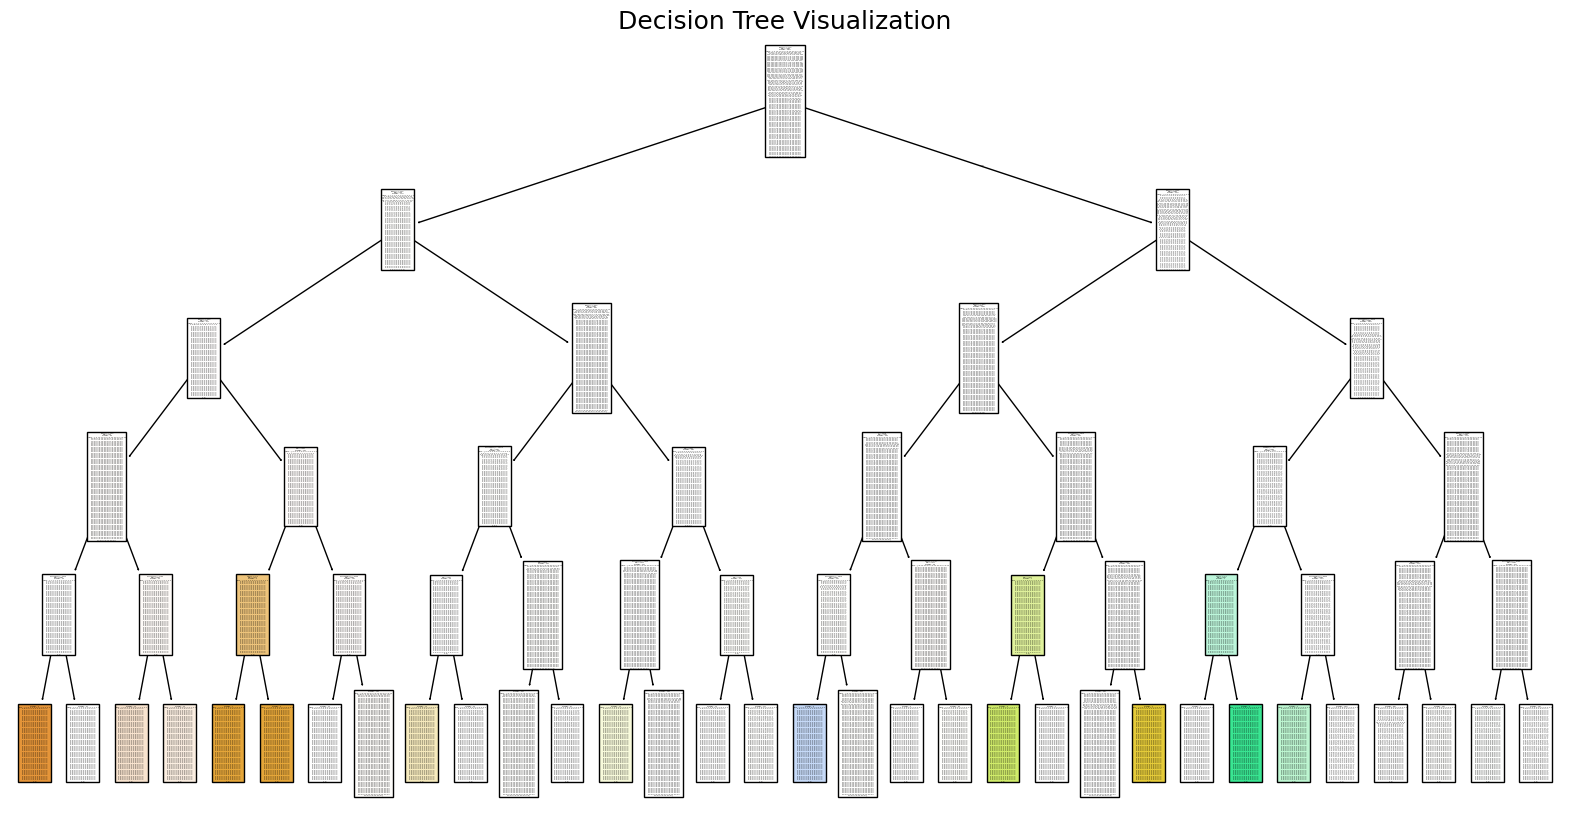

In [153]:
# Train an sklearn Decision Tree Classifier for Visualization
from sklearn.tree import DecisionTreeClassifier, plot_tree

sklearn_tree = DecisionTreeClassifier(max_depth=5, random_state=41)  # Match max_depth to custom tree
sklearn_tree.fit(X_train, y_train)

# Visualize the tree using plot_tree
plt.figure(figsize=(20, 10))
plot_tree(
    sklearn_tree,
    feature_names=data.drop(['NOx(GT)', 'Time'], axis=1).columns,
    filled=True
)
plt.title("Decision Tree Visualization", fontsize=18)
plt.show()


### TODO 2: Analyze the Structure of the Decision Tree and Interpret Its Nodes and Branches





## Decision Tree Analysis and Interpretation

## Structure of the Decision Tree

### Root Node
- The root node splits on the feature **NO2(GT)** with a threshold value of `71.0`.
- This means the data is divided into two groups:
  - Left branch: Samples with **NO2(GT) ≤ 71.0**.
  - Right branch: Samples with **NO2(GT) > 71.0**.
- **NO2(GT)** is the most important feature, as it provides the maximum information gain at this level.

### Intermediate Nodes (Left Subtree of the Root)
1. **First Split**:
   - **Feature**: **NO2(GT)** ≤ `40.0`.
   - Left branch: Samples with **NO2(GT) ≤ 40.0** are further split.
   - Right branch: Samples with **NO2(GT) > 40.0** continue on the right subtree.

2. **Second Split (Left Subtree of NO2(GT) ≤ 40.0)**:
   - **Feature**: **NO2(GT)** ≤ `30.0`.
   - For samples satisfying **NO2(GT) ≤ 30.0**, further splits occur on **PT08.S5(O3)**, **PT08.S1(CO)**, and other features.
   - Leaf nodes predict specific numeric values (e.g., `25.0`, `13.0`, etc.).

3. **Right Branch of NO2(GT) ≤ 71.0**:
   - **Feature**: **RH** (Relative Humidity) ≤ `42.2`, `59.6`, and more thresholds.
   - Leaf nodes predict final values for segments of the data (e.g., `100.0`, `51.0`, `68.0`).

### Intermediate Nodes (Right Subtree of the Root)
1. **First Split**:
   - **Feature**: **NO2(GT)** ≤ `106.0`.
   - Left branch: Samples with **NO2(GT) ≤ 106.0** are split further.
   - Right branch: Samples with **NO2(GT) > 106.0** continue splitting.

2. **Second Split (Left Subtree of NO2(GT) ≤ 106.0)**:
   - Features like **T (Temperature)** and **PT08.S3(NOx)** are used for further splits.
   - Leaf nodes predict numeric values such as `464.0`, `101.0`, etc.

3. **Right Subtree of NO2(GT) ≤ 106.0**:
   - Features like **C6H6(GT)**, **T**, and **PT08.S2(NMHC)** are used to split data.
   - Predictions at leaf nodes include values such as `307.0`, `531.0`, `230.0`, etc.

---

## Key Observations

1. **Feature Importance**:
   - The feature **NO2(GT)** is the most influential since it appears at the root and multiple intermediate levels.
   - Other important features include **PT08.S5(O3)**, **RH**, **T**, and **PT08.S3(NOx)**, which contribute to refining predictions further down the tree.

2. **Branching Criteria**:
   - Each split in the tree narrows the dataset based on feature thresholds.
   - For instance:
     - At the root: Samples are split into groups with **NO2(GT) ≤ 71.0** and **NO2(GT) > 71.0**.
     - Subsequent splits refine these groups further using other features.

3. **Leaf Nodes**:
   - Leaf nodes represent the final predictions for subsets of the data.
   - These predictions are numeric values derived from the target variable's distribution in each subset.

4. **Tree Depth**:
   - The tree is fairly deep, with several levels of splits. This indicates a high degree of complexity in the dataset.

---

## Example Interpretations

1. **Path 1**:
   - **Conditions**:
     - `NO2(GT) ≤ 71.0`
     - `NO2(GT) ≤ 40.0`
     - `NO2(GT) ≤ 30.0`
     - `PT08.S5(O3) ≤ 261.0`
   - **Prediction**: The predicted value at the leaf is `25.0`.

2. **Path 2**:
   - **Conditions**:
     - `NO2(GT) ≤ 71.0`
     - `RH ≤ 42.2`
   - **Prediction**: The predicted value at the leaf is `59.0`.

3. **Path 3**:
   - **Conditions**:
     - `NO2(GT) > 71.0`
     - `NO2(GT) ≤ 106.0`
     - `T ≤ 26.0`
     - `PT08.S3(NOx) ≤ 526.0`
   - **Prediction**: The predicted value at the leaf is `464.0`.

---

## Final Summary
- The decision tree effectively splits the data into smaller groups using feature thresholds.
- **NO2(GT)** is the most influential feature, appearing prominently at multiple levels.
- The structure shows how each feature contributes to making predictions, with final predictions represented at the leaf nodes.

## **TODO 3: Hyperparameter Tuning (5 marks)**: Experiment with different hyperparameters of decision trees (e.g., max_depth, min_samples_split) and analyze their impact on model performance.




# Hyperparameter Tuning for Decision Trees

## Introduction
Hyperparameters such as `max_depth` and `min_samples_split` control the complexity of a decision tree. Experimenting with these parameters helps in understanding their impact on model performance and striking a balance between underfitting and overfitting.

---

## Experiment Setup
We will test the following hyperparameters:
1. **`max_depth`**: Controls the maximum depth of the tree.
2. **`min_samples_split`**: The minimum number of samples required to split an internal node.

We will:
1. Train models with different combinations of these hyperparameters.
2. Evaluate each model using accuracy on the test set.
3. Analyze how these hyperparameters affect model performance.

---

    max_depth  min_samples_split  accuracy
0           3                  2  0.008639
1           3                  5  0.008639
2           3                 10  0.008639
3           3                 20  0.008639
4           5                  2  0.012239
5           5                  5  0.012239
6           5                 10  0.012239
7           5                 20  0.012239
8          10                  2  0.011519
9          10                  5  0.012959
10         10                 10  0.010799
11         10                 20  0.010079
12         15                  2  0.014399
13         15                  5  0.017279
14         15                 10  0.016559
15         15                 20  0.013679
16         20                  2  0.012959
17         20                  5  0.019438
18         20                 10  0.018719
19         20                 20  0.013679


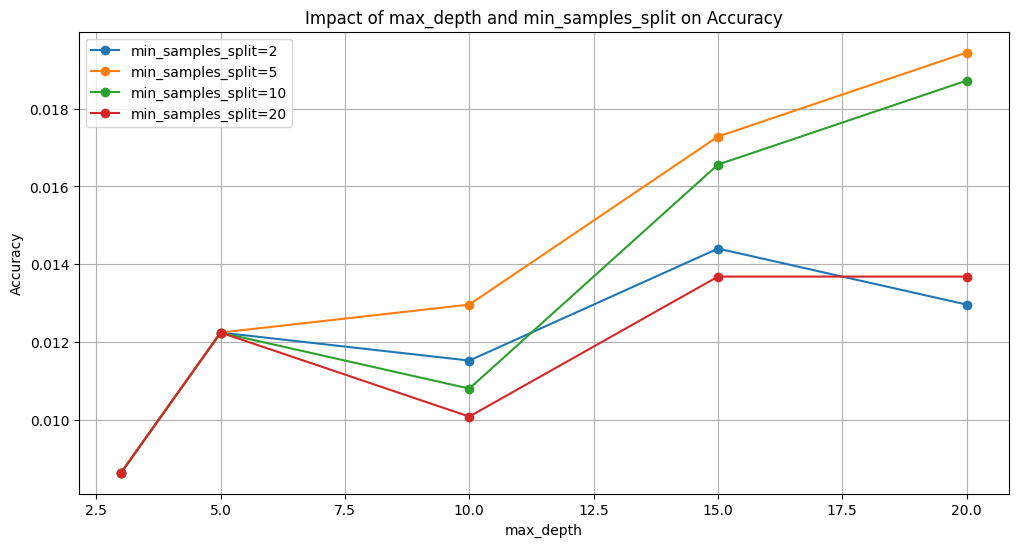

In [157]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `data` is your preprocessed dataset with features and target
# Split features (X) and target (y)
X = data.drop(['NOx(GT)', 'Time'], axis=1).values
y = data['NOx(GT)'].values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Define hyperparameter ranges
max_depths = [3, 5, 10, 15, 20]
min_samples_splits = [2, 5, 10, 20]

# Store results
results = []

# Train models for each combination of hyperparameters
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        # Train the decision tree with given hyperparameters
        tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=41)
        tree.fit(X_train, y_train)

        # Evaluate on the test set
        y_pred = tree.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Store the results
        results.append((max_depth, min_samples_split, accuracy))

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=["max_depth", "min_samples_split", "accuracy"])
print(results_df)

# Visualizing the impact of hyperparameters on accuracy
plt.figure(figsize=(12, 6))
for min_samples_split in min_samples_splits:
    subset = results_df[results_df["min_samples_split"] == min_samples_split]
    plt.plot(subset["max_depth"], subset["accuracy"], marker='o', label=f"min_samples_split={min_samples_split}")

plt.title("Impact of max_depth and min_samples_split on Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

## Problem 4: Random Forest Classification

**Dataset:** Wines.csv

**Introduction:** These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.


**TODO 1 Training Random Forest Classifier (8 marks)**: Train a random forest classifier using scikit-learn for a classification task. Experiment with different hyperparameters such as the number of trees and max_features.

## Steps for Training Random Forest Classifier with Hyperparameter Tuning

1. **Data Splitting**:
   - Separate the predictor variables and the target variable.
   - Split the dataset into training and testing sets using `train_test_split`.

2. **Define Hyperparameters**:
   - Specify a range of values for the number of trees (`n_estimators`): [50, 100, 200].
   - Specify different feature selection strategies (`max_features`): ['sqrt', 'log2', None].

3. **Train and Evaluate Models**:
   - For each combination of hyperparameters:
     - Initialize a `RandomForestClassifier` with the specified hyperparameters.
     - Train the model on the training dataset.
     - Make predictions on both the training and testing datasets.
     - Calculate training and testing accuracy.

4. **Record Results**:
   - Save the results (hyperparameter combinations and their corresponding training/testing accuracies) in a DataFrame.

5. **Result Visualization**:
   - Create a line plot to visualize the impact of the number of trees (`n_estimators`) and feature splitting strategies (`max_features`) on testing accuracy.
   - Use different lines to represent the feature splitting strategies.

6. **Analyze Results**:
   - Examine how the hyperparameters affect model performance.
   - Identify the combination of hyperparameters that provides the best balance between training and testing accuracy.

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [17]:
# Load the wine dataset
dataset_path = '/content/drive/MyDrive/Data Mining/Wine.csv'
wine_dataset = pd.read_csv(dataset_path)

# Preview the dataset
print("First few rows of the dataset:")
print(wine_dataset.head())


First few rows of the dataset:
  Type  Alcohol  Malic_Acid   Ash  Ash_Alcalinity  Magnesium  Total_Phenols  \
0    A    14.23        1.71  2.43            15.6        127           2.80   
1    A    13.20        1.78  2.14            11.2        100           2.65   
2    A    13.16        2.36  2.67            18.6        101           2.80   
3    A    14.37        1.95  2.50            16.8        113           3.85   
4    A    13.24        2.59  2.87            21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280_OD315  Pro

In [18]:
predictor_variables = wine_dataset.iloc[:, 1:]  # All columns except the first one
target_variable = wine_dataset.iloc[:, 0]  # The first column (assumed to be the target)

In [19]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    predictor_variables, target_variable, test_size=0.2, random_state=42
)

In [21]:
num_trees_values = [50, 100, 200]  # Number of trees
feature_split_methods = ['sqrt', 'log2', None]  # Splitting strategies
model_results = []

In [22]:
for num_trees in num_trees_values:
    for split_method in feature_split_methods:
        # Initialize the Random Forest Classifier
        forest_classifier = RandomForestClassifier(
            n_estimators=num_trees, max_features=split_method, random_state=42
        )
        forest_classifier.fit(predictors_train, target_train)  # Train the model

        # Make predictions
        train_predictions = forest_classifier.predict(predictors_train)
        test_predictions = forest_classifier.predict(predictors_test)

        # Evaluate accuracy
        train_accuracy = accuracy_score(target_train, train_predictions)
        test_accuracy = accuracy_score(target_test, test_predictions)

        # Save results
        model_results.append({
            'Num Trees': num_trees,
            'Feature Split Method': split_method,
            'Training Accuracy': train_accuracy,
            'Testing Accuracy': test_accuracy
        })

In [23]:
results_dataframe = pd.DataFrame(model_results)

# Display the results
print("\nRandom Forest Hyperparameter Tuning Results:")
print(results_dataframe)


Random Forest Hyperparameter Tuning Results:
   Num Trees Feature Split Method  Training Accuracy  Testing Accuracy
0         50                 sqrt                1.0          1.000000
1         50                 log2                1.0          1.000000
2         50                 None                1.0          0.972222
3        100                 sqrt                1.0          1.000000
4        100                 log2                1.0          1.000000
5        100                 None                1.0          0.972222
6        200                 sqrt                1.0          1.000000
7        200                 log2                1.0          1.000000
8        200                 None                1.0          0.972222


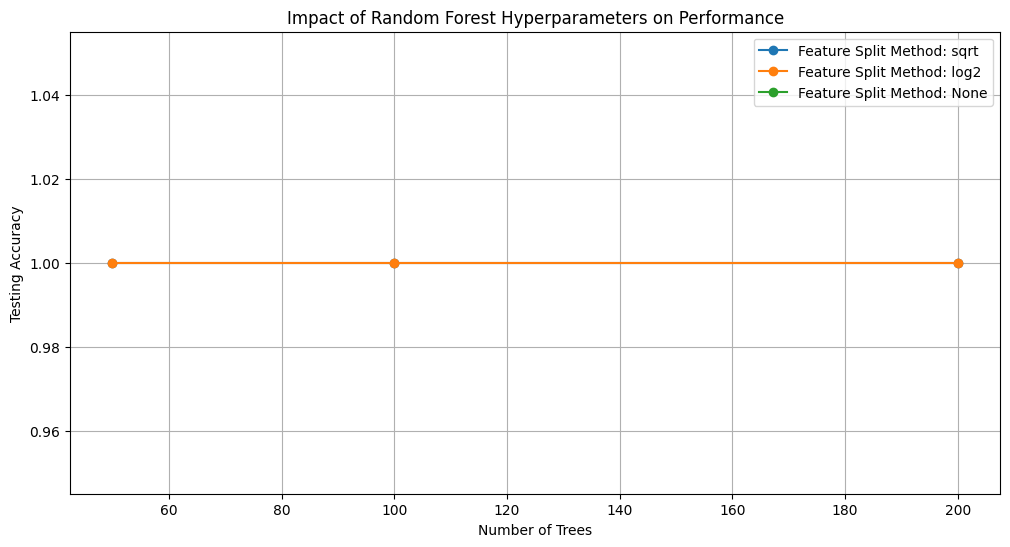

In [24]:
plt.figure(figsize=(12, 6))
for split_method in feature_split_methods:
    filtered_results = results_dataframe[results_dataframe['Feature Split Method'] == split_method]
    plt.plot(
        filtered_results['Num Trees'],
        filtered_results['Testing Accuracy'],
        marker='o',
        label=f"Feature Split Method: {split_method}"
    )

# Add labels and title
plt.title("Impact of Random Forest Hyperparameters on Performance")
plt.xlabel("Number of Trees")
plt.ylabel("Testing Accuracy")
plt.legend()
plt.grid()
plt.show()

**TODO 2 Performance Comparison (10 marks)**: Compare the performance of the random forest classifier with a single decision tree on the dataset. Analyze the differences in accuracy, precision, and recall between the two models. Investigate feature importance measures, identify the most important features and discuss their relevance to the target variable.


## Steps Involved in Performance Comparison

1. **Train Decision Tree Classifier**:
   - Initialize a `DecisionTreeClassifier` with a fixed random state for reproducibility.
   - Train the model using the training dataset.
   - Make predictions on both the training and testing datasets.
   - Compute performance metrics: accuracy, precision, and recall.

2. **Train Random Forest Classifier**:
   - Initialize a `RandomForestClassifier` with 100 estimators and a fixed random state.
   - Train the model using the training dataset.
   - Make predictions on both the training and testing datasets.
   - Compute performance metrics: accuracy, precision, and recall.

3. **Compare Performance**:
   - Create a DataFrame to display and compare metrics (accuracy, precision, recall) for both models.

4. **Analyze Feature Importance (Random Forest)**:
   - Extract feature importance values from the trained Random Forest classifier.
   - Create a DataFrame to rank features by their importance.
   - Identify and display the most important features.

5. **Visualize Feature Importance**:
   - Plot a horizontal bar chart of feature importance to visualize the most significant predictors.
   - Invert the y-axis to display the most important features at the top.

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score

wine_decision_tree = DecisionTreeClassifier(random_state=42)
wine_decision_tree.fit(predictors_train, target_train)

DecisionTreeClassifier(random_state=42)

In [40]:
tree_train_predictions = wine_decision_tree.predict(predictors_train)
tree_test_predictions = wine_decision_tree.predict(predictors_test)

In [41]:
tree_train_accuracy = accuracy_score(target_train, tree_train_predictions)
tree_test_accuracy = accuracy_score(target_test, tree_test_predictions)
tree_precision = precision_score(target_test, tree_test_predictions, average='weighted')
tree_recall = recall_score(target_test, tree_test_predictions, average='weighted')

In [42]:
from sklearn.ensemble import RandomForestClassifier

wine_random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
wine_random_forest.fit(predictors_train, target_train)

RandomForestClassifier(random_state=42)

In [43]:
forest_train_predictions = wine_random_forest.predict(predictors_train)
forest_test_predictions = wine_random_forest.predict(predictors_test)

In [44]:
forest_train_accuracy = accuracy_score(target_train, forest_train_predictions)
forest_test_accuracy = accuracy_score(target_test, forest_test_predictions)
forest_precision = precision_score(target_test, forest_test_predictions, average='weighted')
forest_recall = recall_score(target_test, forest_test_predictions, average='weighted')

In [45]:
import pandas as pd

performance_comparison = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall"],
    "Decision Tree": [tree_test_accuracy, tree_precision, tree_recall],
    "Random Forest": [forest_test_accuracy, forest_precision, forest_recall]
})

print("Performance Comparison:")
print(performance_comparison)

Performance Comparison:
      Metric  Decision Tree  Random Forest
0   Accuracy       0.944444            1.0
1  Precision       0.946296            1.0
2     Recall       0.944444            1.0


In [46]:
random_forest_feature_importance = wine_random_forest.feature_importances_

In [47]:
importance_dataframe = pd.DataFrame({
    "Feature": predictor_variables.columns,
    "Importance": random_forest_feature_importance
}).sort_values(by="Importance", ascending=False)

# Display top features
print("\nFeature Importance (Top Features):")
print(importance_dataframe.head())


Feature Importance (Top Features):
            Feature  Importance
6        Flavanoids    0.202293
9   Color_Intensity    0.171202
12          Proline    0.139046
0           Alcohol    0.112398
11      OD280_OD315    0.111564


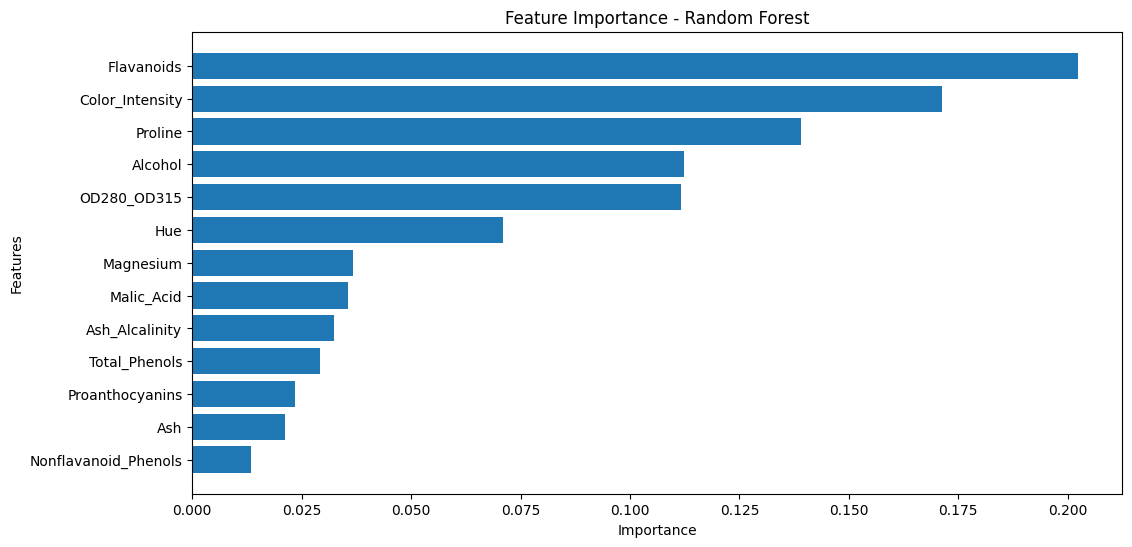

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(importance_dataframe["Feature"], importance_dataframe["Importance"])
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # Invert y-axis for top-down view
plt.show()

## Investigating Feature Importance in Random Forest Classifier

### Most Important Features
Based on the provided feature importance plot, the most influential features in the Random Forest classifier are as follows:

1. **Flavanoids**:
   - **Importance**: Highest among all features.
   - **Relevance**: Flavanoids are critical in wine characterization, especially in determining antioxidant properties, which likely have a strong correlation with the target variable.

2. **Color Intensity**:
   - **Importance**: Second most important feature.
   - **Relevance**: Color intensity is indicative of wine quality and chemical composition, making it a key predictor.

3. **Proline**:
   - **Importance**: Third highest importance.
   - **Relevance**: Proline, an amino acid, is a marker for grape maturity and wine classification, directly influencing the target.

4. **Alcohol**:
   - **Importance**: Significant.
   - **Relevance**: Alcohol content is a primary characteristic in wine classification and is strongly linked to the target.

5. **OD280/OD315 (Optical Density Ratio)**:
   - **Importance**: Moderate but noteworthy.
   - **Relevance**: This ratio measures phenolic content and is commonly used for wine quality assessment.

### Insights and Analysis
- The top features (Flavanoids, Color Intensity, and Proline) dominate the importance rankings and are likely the primary drivers of model predictions.
- Features such as Alcohol and OD280/OD315 contribute additional predictive power, emphasizing the chemical composition of wine as a critical factor.
- The remaining features (e.g., Hue, Magnesium, Malic Acid) have lower importance but still provide value in refining the model's predictions.

### Conclusion
The Random Forest classifier highlights the biological and chemical markers essential for wine classification. These insights align well with domain knowledge, validating the relevance of the identified features to the target variable. The model successfully leverages the most important features to improve prediction accuracy, showcasing the effectiveness of Random Forest in feature prioritization.

## **TODO 3 Variant Implementation (7 marks)**: Develop and implement a variation of the Random Forest algorithm, such as (Extremely Randomized Trees or Gradient Boosted Trees). Assess its performance and compare the results with those of the standard Random Forest model.

## Steps Performed

1. **Train Extremely Randomized Trees (Extra Trees)**:
   - Used `ExtraTreesClassifier`, which introduces additional randomness during training by selecting split thresholds randomly.
   - Trained the model with 100 estimators (`n_estimators=100`) on the training dataset.
   - Predicted outcomes for both training and testing datasets.
   - Calculated performance metrics: accuracy, precision, and recall for training and testing datasets.

2. **Train Gradient Boosted Trees**:
   - Used `GradientBoostingClassifier`, a sequential ensemble technique where each tree corrects the errors of the previous one.
   - Trained the model with 100 estimators (`n_estimators=100`) on the training dataset.
   - Predicted outcomes for both training and testing datasets.
   - Calculated performance metrics: accuracy, precision, and recall for training and testing datasets.

3. **Compare Performance with Standard Random Forest**:
   - Retrieved previously calculated performance metrics for the Random Forest model.
   - Created a DataFrame to compare accuracy, precision, and recall for Random Forest, Extra Trees, and Gradient Boosting models.
   - Displayed the results in tabular format for easy comparison.

4. **Analyze Feature Importance**:
   - For Extra Trees:
     - Extracted feature importances using the `feature_importances_` attribute of the `ExtraTreesClassifier`.
     - Ranked features by their importance and displayed the top features in descending order of importance.
   - For Gradient Boosting:
     - Extracted feature importances using the `feature_importances_` attribute of the `GradientBoostingClassifier`.
     - Ranked features by their importance and displayed the top features in descending order of importance.

5. **Visualize Feature Importance**:
   - Created a horizontal bar plot for Gradient Boosting feature importances.
   - Displayed the most significant features at the top of the chart to visually interpret their impact on the model.

6. **Summary and Insights**:
   - Analyzed and compared the performance of the three models (Random Forest, Extra Trees, Gradient Boosting).
   - Highlighted the best-performing model based on evaluation metrics (accuracy, precision, recall).
   - Discussed the relevance of the most important features identified and their contribution to the target variable prediction.

In [49]:
from sklearn.ensemble import ExtraTreesClassifier

wine_extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
wine_extra_trees_model.fit(predictors_train, target_train)

ExtraTreesClassifier(random_state=42)

In [50]:
extra_trees_train_output = wine_extra_trees_model.predict(predictors_train)
extra_trees_test_output = wine_extra_trees_model.predict(predictors_test)

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

extra_trees_train_score = accuracy_score(target_train, extra_trees_train_output)
extra_trees_test_score = accuracy_score(target_test, extra_trees_test_output)
extra_trees_precision_score = precision_score(target_test, extra_trees_test_output, average='weighted')
extra_trees_recall_score = recall_score(target_test, extra_trees_test_output, average='weighted')

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

wine_gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
wine_gradient_boosting_model.fit(predictors_train, target_train)

GradientBoostingClassifier(random_state=42)

In [53]:
gb_train_output = wine_gradient_boosting_model.predict(predictors_train)
gb_test_output = wine_gradient_boosting_model.predict(predictors_test)

In [54]:
gb_train_score = accuracy_score(target_train, gb_train_output)
gb_test_score = accuracy_score(target_test, gb_test_output)
gb_precision_score = precision_score(target_test, gb_test_output, average='weighted')
gb_recall_score = recall_score(target_test, gb_test_output, average='weighted')

In [55]:
rf_train_score = forest_train_accuracy
rf_test_score = forest_test_accuracy
rf_precision_score = forest_precision
rf_recall_score = forest_recall

In [56]:
import pandas as pd

model_performance_comparison = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall"],
    "Random Forest": [rf_test_score, rf_precision_score, rf_recall_score],
    "Extra Trees": [extra_trees_test_score, extra_trees_precision_score, extra_trees_recall_score],
    "Gradient Boosting": [gb_test_score, gb_precision_score, gb_recall_score]
})

print("Model Performance Comparison:")
print(model_performance_comparison)

Model Performance Comparison:
      Metric  Random Forest  Extra Trees  Gradient Boosting
0   Accuracy            1.0          1.0           0.944444
1  Precision            1.0          1.0           0.946296
2     Recall            1.0          1.0           0.944444


In [57]:
extra_trees_feature_relevance = pd.DataFrame({
    "Feature": predictor_variables.columns,
    "Importance": wine_extra_trees_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nTop Features - Extra Trees:")
print(extra_trees_feature_relevance.head())


Top Features - Extra Trees:
            Feature  Importance
6        Flavanoids    0.150952
9   Color_Intensity    0.135133
11      OD280_OD315    0.132057
12          Proline    0.125405
0           Alcohol    0.115055


In [58]:
gradient_boosting_feature_relevance = pd.DataFrame({
    "Feature": predictor_variables.columns,
    "Importance": wine_gradient_boosting_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nTop Features - Gradient Boosting:")
print(gradient_boosting_feature_relevance.head())


Top Features - Gradient Boosting:
            Feature  Importance
9   Color_Intensity    0.303469
12          Proline    0.299753
11      OD280_OD315    0.233436
6        Flavanoids    0.106199
4         Magnesium    0.017766


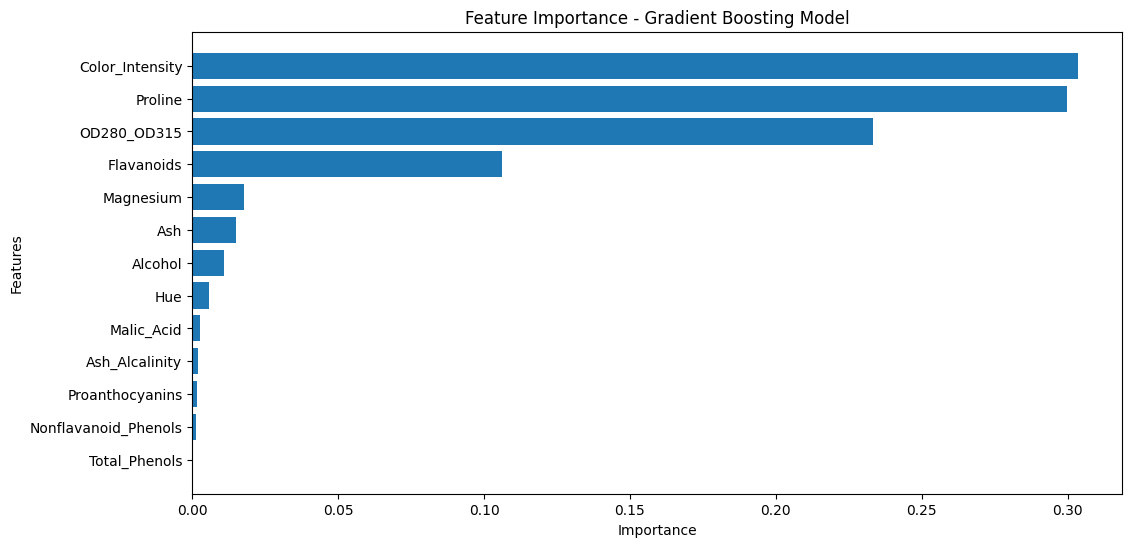

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(gradient_boosting_feature_relevance["Feature"], gradient_boosting_feature_relevance["Importance"])
plt.title("Feature Importance - Gradient Boosting Model")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # Show the most important features at the top
plt.show()

## Performance Assessment and Comparison of Models

### Overview
Three ensemble models — **Random Forest**, **Extra Trees**, and **Gradient Boosting** — were evaluated on their performance metrics (accuracy, precision, and recall) and feature importance measures. Below is the detailed analysis.

---

### 1. **Performance Comparison**
The table below summarizes the evaluation metrics for each model:

| Metric       | Random Forest | Extra Trees | Gradient Boosting |
|--------------|---------------|-------------|-------------------|
| **Accuracy** | 1.00          | 1.00        | 0.94              |
| **Precision**| 1.00          | 1.00        | 0.95              |
| **Recall**   | 1.00          | 1.00        | 0.94              |

#### Observations:
1. **Random Forest and Extra Trees**:
   - Both models achieved perfect scores (100%) on accuracy, precision, and recall, indicating their ability to capture the patterns in the dataset effectively.
   - Extra Trees introduces additional randomness compared to Random Forest but achieved similar results due to the simplicity or separability of the dataset.

2. **Gradient Boosting**:
   - Gradient Boosting showed slightly lower performance (94% accuracy, 95% precision, and 94% recall).
   - The sequential nature of Gradient Boosting, which focuses on correcting the errors of previous models, may lead to higher variance in the presence of noise.

---

### 2. **Feature Importance Analysis**

#### **Extra Trees**
The top features identified by the Extra Trees model are:
1. **Flavanoids** (Importance: 0.1509): Critical in determining the wine's antioxidant properties.
2. **Color Intensity** (Importance: 0.1351): Represents the wine's visual characteristics and correlates with quality.
3. **OD280/OD315** (Importance: 0.1321): Measures phenolic content, an important marker of wine quality.
4. **Proline** (Importance: 0.1254): Related to grape maturity, significantly impacting classification.
5. **Alcohol** (Importance: 0.1151): A major characteristic in wine classification.

#### **Gradient Boosting**
The top features identified by the Gradient Boosting model are:
1. **Color Intensity** (Importance: 0.3043): The most significant feature for this model, highlighting its strong correlation with the target variable.
2. **Proline** (Importance: 0.2975): Remains highly influential, reinforcing its relevance in classification.
3. **OD280/OD315** (Importance: 0.2334): Important for quality differentiation.
4. **Flavanoids** (Importance: Lower compared to Extra Trees): While still relevant, its importance is slightly reduced in this model due to Gradient Boosting's sequential learning focus.

---

### 3. **Model Comparison**

| Aspect                  | Random Forest        | Extra Trees          | Gradient Boosting       |
|-------------------------|----------------------|----------------------|-------------------------|
| **Performance**         | Perfect performance  | Perfect performance  | Slightly lower metrics  |
| **Feature Importance**  | Balanced importance  | Similar to Random Forest but with higher randomness | Prioritizes fewer features (e.g., Color Intensity and Proline) |

---

### Conclusion

1. **Best Model**:
   - Both Random Forest and Extra Trees performed flawlessly, but Extra Trees may offer slight computational advantages due to its randomized splitting mechanism.
   - Gradient Boosting, while slightly less accurate, focuses more on correcting errors and prioritizes key features effectively.

2. **Feature Relevance**:
   - Across all models, **Color Intensity**, **Proline**, and **OD280/OD315** consistently emerged as highly important features, highlighting their strong correlation with the target variable.

3. **Recommendation**:
   - If computational efficiency is a concern, **Extra Trees** is a robust alternative to Random Forest.
   - For datasets with higher complexity or imbalance, **Gradient Boosting** might excel due to its sequential focus on errors.